# Основы работы с PyTorch


## Вводная информация про PyTorch

Фреймворк [`PyTorch`](https://pytorch.org/) — это библиотека машинного обучения с открытым исходным кодом для языка программирования `Python`. Как правило, фреймворк `PyTorch` используется для приложений [глубокого обучения нейронных сетей](https://www.deeplearningbook.org/).
Первоначально `PyTorch` был разработан исследовательской группой по искусственному интеллекту в виде фреймворка `torch` для языка программирования `Luno`.

Сегодня `PyTorch` представляет собой основной и один из наиболее популярных фреймворков для работы с нейронными сетями. Вокруг фреймворка собрано активное сообщество, которое не только поддерживает сам фреймворк, но и развивает свои проекты на его основе. Наиболее успешные из таких проектов попадают в т. н. [экосистему `PyTorch`](https://pytorch.org/ecosystem/). Также на `PyTorch` написаны такие известные инструменты, как инструменты сообщества [Hugging Face](https://huggingface.co/) и многие другие.

Особенностями `PyTorch` являются удобство работы с большими упорядоченными массивами данных, в том числе на разных вычислителях; возможности автоматизации обучения нейронных сетей такими методами, как обратное распространение ошибки, и удобство работы с отдельными слоями и составляющими архитектур нейронных сетей. Данная практика посвящена изучению указанных особенностей `PyTorch`.

<blockquote>
    
Также можно рекомендовать следующие ресурсы для дополнительного изучения `PyTorch`:
<!-- * https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html — официальный курс `PyTorch` за 60 минут. -->
* [Коллекция официальных уроков по `PyTorch`]( https://pytorch.org/tutorials/index.html), например [базовые уроки](https://pytorch.org/tutorials/beginner/basics/intro.html) .
* [Набор более специализированных официальных уроков `PyTorch`](https://pytorch.org/tutorials/recipes/recipes_index.html).
* [Dive into Deep Learning](https://d2l.ai/). Интерактивная книга с примерами на `PyTorch` и других фреймворках.
* [Learn PyTorch for Deep Learning: Zero to Mastery book](https://www.learnpytorch.io/).
* [Deep PyTorch Tutorials](https://github.com/sgrvinod/Deep-Tutorials-for-PyTorch).
* [UvA Deep Learning Tutorials](https://uvadlc-notebooks.readthedocs.io/en/latest/index.html).
* [Deep Learning Wizard](https://www.deeplearningwizard.com/deep_learning/intro/), интерактивная книга.
* [Коллекция ресурсов, посвященных `PyTorch`](https://github.com/ritchieng/the-incredible-pytorch).
* [Курс от `PyTorch Lightning`](https://github.com/Lightning-AI/dl-fundamentals).

> Кракто, в виде справки перечислим [основные особенности](https://github.com/Devinterview-io/pytorch-interview-questions) фреймворка `PyTorch`.
> * __Динамические вычисления__. В отличие от популярного [`TensorFlow`](https://www.tensorflow.org/?hl=ru) ( и фреймворков на его основе, например [`keras`](https://keras.io/), который в основном использует <tt>статические вычислительные графы</tt>, [`PyTorch`](https://pytorch.org/) предлагает <tt>динамические вычислительные возможности</tt>. Это позволяет ему работать с более сложными архитектурами и облегчает итеративный, удобный для отладки рабочий процесс. Более того, динамическая природа `PyTorch` естественным образом сочетается с питоновскими конструкциями, что приводит к более интуитивному опыту разработки.
> * __Простота использования.__ `PyTorch` известен своим упрощенным, питоновским интерфейсом. Это делает процесс построения и обучения моделей более доступным, особенно для разработчиков с опытом работы на `Python`.
> * __Ускорение на <tt>`GPU`</tt>__. `PyTorch` отлично использует вычислительные возможности графических процессоров, значительно сокращая время обучения. Он также обеспечивает беспрепятственное использование нескольких <tt>`GPU`</tt>.
> * __Гибкость модели__. Еще одной отличительной особенностью является возможность интеграции управляющих структур `Python`, таких как циклы и условия, что дает разработчикам большую гибкость в определении поведения модели.
> * __Отладка и визуализация__. `PyTorch` интегрируется с такими библиотеками, как matplotlib, и предлагает набор отладочных инструментов, а именно `torch.utils.bottleneck`, `torch.utils.tester` и `torch.utils.gdb`.

Таким образом, следует выбирать PyTorch для:
* проектов, ориентированных на исследования. Особенно для проектов, в которых требуется динамическое поведение или эксперименты с архитектурами нейронных сетей.
* прототипирования. Для быстрого и оперативного цикла разработки.
* проектов малого и среднего масштаба. Там, где важны простота использования и быстрое обучение.

Давайте для начала попробуем импортировать библиотеку PyTorch.

## Импорт необходимых библиотек

проверим, что версия `torch` 2

In [2]:
import torch
print('version:',torch.version.__version__)

version: 2.3.1+cpu


проверим версию `torchvision`

In [3]:
import torchvision
print('version:',torchvision.version.__version__)

version: 0.18.1+cpu


In [4]:
import torchinfo

Теперь попробуем импортировать остальные библиотеки, которые понадобятся нам в этом уроке.

In [5]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# Настройки `Pytorch`

## Настройка вычислителей

Теперь выберем устройство. Чаще всего возможны варианты использования `PyTorch` с центральным процессором (`CPU`) или с графическим ускорителем (`GPU`) компании `NVidia` (поддержка фреймворка `cuda`). Однако, также последние версии `PyTorch` позволяют работать с расширенным набором устройств, среди которых следующие варианты: `cpu, cuda, mps, xpu` и другие.

Итак, выберем устройство (`CPU` или `GPU`) и выведем необходимую информацию.

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


Проведем проверку на:
* установим тип данных по умолчанию  ```torch.set_default_tensor_type()``` как float ```torch.cuda.FloatTensor```,
* доступность числа `GPU` ```torch.cuda.device_count()```,
* получим названя вычислителей: ```torch.cuda.get_device_name()```
* проверим доступный объем ОЗУ ```torch.cuda.memory_allocated()```
* занятый объем памяти ```torch.cuda.memory_reserved()```

In [7]:
if device.type == 'cuda':
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    print('Cuda is available:',torch.cuda.is_available())

    n_devices = torch.cuda.device_count()
    print('number of devices: %d'%(n_devices))

    for cnt_device in range(n_devices):
        print(torch.cuda.get_device_name(cnt_device))
        print('Memory Usage:')
        print('Allocated:', round(torch.cuda.memory_allocated(cnt_device)/1024**3,1), 'GB')
        print('Cached:   ', round(torch.cuda.memory_reserved(cnt_device)/1024**3,1), 'GB')
else:
    dtype = torch.float
    torch.set_default_dtype(dtype) # float32


Если `GPU` не доступны, то установим тип данных float.

получим число ядер `CPU` - число доступных т.н. `workers`


In [8]:
num_workers=os.cpu_count()
print ('available number of workers:',num_workers)

dtype = torch.float
torch.set_default_dtype(dtype) # float32
print('Current data type:',dtype)

available number of workers: 4
Current data type: torch.float32


<blockquote>
    
Оттметим также дополнительно возможность в некоторых приложениях использования ядер M1/M2. Установить устройство для этого можно [следующим образом](https://pytorch.org/docs/stable/notes/mps.html).

```Python
    if not torch.backends.mps.is_available():
        if not torch.backends.mps.is_built():
            print("MPS not available because the current PyTorch install was not "
                  "built with MPS enabled.")
        else:
            print("MPS not available because the current MacOS version is not 12.3+ "
                  "and/or you do not have an MPS-enabled device on this machine.")
    
    else:
        mps_device = torch.device("mps")
```

</blockquote>

В некоторых случаях, особенно при использовании `GPU` нам также потребуется функционал для очистки кеш-памяти.

In [9]:
def clean_memory():
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

    to_remove = set()
    for k, v in globals().items():
        if isinstance(v, (torch.nn.Module)):
            to_remove.add(k)
    for k in to_remove:
        del globals()[k]
    gc.collect()

## Настройка воспроизводимости результатов

Отметим также, что по каждому устройству `GPU` может быть получена информация при помощи функций `torch.cuda.get_device_properties(device)` и `torch.cuda.mem_get_info(device=None)`; или в командной строке при помощи утилиты `nvidia-smi`. Более подробную информацию о доступной информации о `GPU` можно получить в соответствующем разделе документации [тут](https://pytorch.org/docs/stable/notes/cuda.html).

В целях воспроизводимости экспериментов мы установим все случайные величины в одно положение. Однако отметим, что следующий код гарантирует воспроизводимость результатов только для одной конфигурации вычислительного устройства, включая как его аппаратную, так и его программную часть. Также отмечается, что в некоторых случаях использование директив `deterministic` и `use_deterministic_algorithms` из кода ниже может замедлять или даже приводить к ошибкам в работе `PyTorch`. Поэтому такие директивы лучше использовать только в контролируемых экспериментах. Подробней о данной теме можно узнать [тут](https://pytorch.org/docs/stable/notes/randomness.html) и [тут](https://gist.github.com/Guitaricet/28fbb2a753b1bb888ef0b2731c03c031).

In [10]:
seed = 42
torch.manual_seed(seed) #cpu
torch.cuda.manual_seed(seed) #gpu
np.random.seed(seed) # numpy
random.seed(seed) # random and transforms

torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic=True #cudnn
torch.use_deterministic_algorithms(True)
torch.backends.cudnn.benchmark = False

# Понятие тензор в `torch`

## Тензор в глубоком обучение нейронных сетей

Основной тип данных в `PyTorch` — это [<tt>тензор</tt>](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html). Тензоры могут быть разной размерности и разного типа данных.  

В нашем случае мы установили основной тип значений `float32`.

Однако `PyTorch` поддерживает и другие типы, про которые можно узнать [тут](https://pytorch.org/docs/stable/tensors.html).

Важно понимать, что `PyTorch` является строго типизированным фреймворком, это значит, что типы данных должны быть заданы и для каждой операции должны совпадать или быть преобразованными.

Также отметим, что тензор в данном понимании отличается от стандартного, принятого в физике, и обозначает просто многомерную матрицу.

>В глубоком обучении [тензоры](https://www.dataquest.io/blog/pytorch-for-beginners/) - это фундаментальная структура данных, очень похожая на массивы и матрицы, с помощью которой мы можем эффективно выполнять математические операции над большими наборами данных. Тензор может быть представлен как матрица, а также как вектор, скаляр или массив более высокой размерности.

>Чтобы было проще представить, можно думать о тензоре как о простом массиве, содержащем скаляры или другие массивы. В `PyTorch` тензор - это структура, очень похожая на `ndarray`, с той лишь разницей, что они могут работать на `GPU`, что значительно ускоряет процесс вычислений.



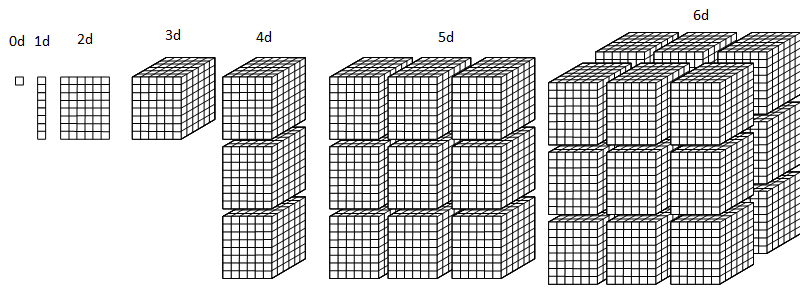

>Отметим [основные особенности](https://github.com/Devinterview-io/pytorch-interview-questions) использования понятия тензор.
В `PyTorch` тензоры служат фундаментальным строительным блоком, обеспечивающим эффективные численные вычисления на различных устройствах, таких как `CPU, GPU и TPU`. Концептуально тензоры похожи на numpy.arrays, но при этом имеют преимущества аппаратного ускорения и предлагают ряд дополнительных возможностей для глубокого обучения и научных вычислений.
> Основные возможности:
> * __Автоматическое дифференцирование__. Тензоры отслеживают операции, выполняемые над ними, что позволяет мгновенно дифференцировать их для таких задач, как градиентный спуск в нейронных сетях. Установив флаг `requires_grad`, вы можете указать, какие тензоры должны отслеживать свои градиенты.
> * __Вычислительные графы__. Операции над тензорами строят вычислительные графы, позволяя проследить поток данных и связанных с ними градиентов.
> * __Агностичность по отношению к устройствам.__ Тензоры можно гибко перемещать между доступными аппаратными ресурсами для оптимальных вычислений.
> * __Гибкое управление памятью. `PyTorch` динамически управляет памятью, а его тензоры знают о вычислительном графе, что делает сборку мусора более эффективной.
> * __Уникальные тензоры__ `Float16`, `Float32`, `Float64`. Тензоры поддерживают различные численные точности, по умолчанию используются $32$-битные плавающие числа.
> * __Разреженные тензоры__ - эти тензоры похожи на плотные, но оптимизированы для задач с большим количеством нулей, что позволяет экономить память и вычисления.
> * __Квантованные тензоры__ - это тензоры, разработанные специально для задач, требующих пониженной точности, чтобы получить преимущества от более быстрых операций и меньшей занимаемой памяти.
> * __Операции над элементами__ - `PyTorch` рассчитан на параллелизм и предоставляет богатый набор поэлементных операций, которые можно применять различными способами.




Рассмотрим примеры некоторых из приведенных выше тензоров:

In [11]:
x = torch.tensor(3.)
print(f'скалярная величина: {x}, {x.ndim}-d размерность\n')

x = torch.tensor([3.,2])
print(f'векторная величина: {x}, {x.ndim}-d размерность\n')

x = torch.tensor([[1.,2],[3.,4]])
print(f'матрица величина: \n{x},\n {x.ndim}-d размерность\n')

x = torch.tensor([[[1.,2],[3.,4]],[[5.,6],[7.,8]]])
print(f'набор матриц: \n{x},\n {x.ndim}-d размерность\n')
print(f' и т.д.')

скалярная величина: 3.0, 0-d размерность

векторная величина: tensor([3., 2.]), 1-d размерность

матрица величина: 
tensor([[1., 2.],
        [3., 4.]]),
 2-d размерность

набор матриц: 
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]]),
 3-d размерность

 и т.д.


Тензоры могут быть заданы напрямую при помощи функции `torch.tensor` или преобразованы, например, из `numpy` при помощи функции `from_numpy`.

In [12]:
x = torch.randn(2, 1)

x_np = np.random.randn(2,1)
x_torch = torch.from_numpy(x_np)
print(x_torch)

tensor([[ 0.4967],
        [-0.1383]], dtype=torch.float64)


Однако, также может быть выполнено и прямое преобразование типов данных.

In [13]:
numpy_array = np.array([1, 2, 3, 4])
tensor = torch.Tensor(numpy_array)

Кроме того, тензор может быть размещен в различном пространстве памяти. Он может храниться на `CPU` (по умолчанию) или на `GPU` либо другом устройстве. Для этого тензор можно отправлять на нужное устройство при помощи метода `to()` или напрямую `cpu()`, `cuda()`. Тут мы будем указывать ранее полученное значение переменной `device`.
<!-- . -->

In [14]:
print(device)
x = torch.randn(2, 1).to(device)

cpu


Тензор может быть отправлен на необходимое устройство сразу при создании.

In [15]:
x = torch.tensor([1,2],device = device)

x = torch.tensor([1,2]).cpu()
if torch.cuda.is_available():
    x = torch.tensor([1,2]).cuda()

Также отметим, что в случае наличия нескольких `GPU` тензоры могут быть направлены на них автоматически.
Ниже приведен пример работы с несколькими `GPU`.

In [16]:
if torch.cuda.is_available():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    x.to(device)  # Moves model to GPU device

if torch.cuda.device_count() > 1:  # Checks for multiple GPUs
    x = torch.nn.DataParallel(x)  # Wraps model for multi-GPU training

> Кроме того, тензор может быть вычислен на заданном `GPU` с использованием контекстного менеджера.

In [17]:
if torch.cuda.is_available():
    with torch.cuda.device(0):
        x_on_specific_gpu = torch.rand(2, 2)
        print(x_on_specific_gpu)

> **В числе лучших практик.** Важно понимать, что, хотя `GPU` обеспечивают огромную мощность параллельной обработки, они также имеют высокую задержку (<tt>латентность, latency</tt>) и ограниченную память (<tt>GRAM, GDDR</tt>) по сравнению с `CPU`.
Поэтому очень важно передавать данные (тензоры и модели) на `GPU` только в случае необходимости, чтобы минимизировать эти накладные расходы.

__Важно__. Тензор можно преобразовать обратно, например, в массив numpy, только если он находится в `CPU` и не используется в текущих вычислениях. Поэтому для вывода тензора в numpy мы будем создавать его копию при помощи `detach()` и будем использовать прямую директиву `cpu`.

In [18]:
x = torch.randn(2, 1)
print(x)

x_np = x.data.cpu().numpy()
print(x_np)

x_np = x.detach().cpu().numpy()
print(x_np)

tensor([[-1.1229],
        [-0.1863]])
[[-1.1228564 ]
 [-0.18632829]]
[[-1.1228564 ]
 [-0.18632829]]


Наличие тензора на `GPU` можно порверить директивой `is_cuda`

In [19]:
x = x.to(device)
print(x.device)
print(x.is_cuda)
print(x.cpu().is_cuda)

cpu
False
False


Также устройство и другие атрибуты тензора могут быть проверены следующими функциями

In [20]:
x = torch.tensor([1,2]).to(device)
print(f'shape: {x.shape}, device: {x.device}, dtype: {x.dtype}, n dims: {x.ndim}')

shape: torch.Size([2]), device: cpu, dtype: torch.int64, n dims: 1


Обратите внимание, что в торч методы `shape` и `size()` - это почти синонимы. Однако `shape` - это атрибут

In [21]:
x.shape, x.size()

(torch.Size([2]), torch.Size([2]))

C [тензорами](https://pytorch.org/docs/stable/tensors.html#) можно проводить большенство тех-же операций, что и с массивами в `NumPy`

## Представление данных в PyTorch

Второй тип специальных операций — это __представление__. Тут наиболее важной является операция `view`. Эта операция представляет один и тот же набор значений как тензоры разной размерности. Важно понимать, что функция не меняет расположение значений в памяти. При этом и переменная, содержащая тензор, остается на месте.


In [22]:
t = torch.rand(4, 4)
print(t)
b = t.view(2, 8)
print(b)

tensor([[0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317],
        [0.1053, 0.2695, 0.3588, 0.1994]])
tensor([[0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317, 0.1053, 0.2695, 0.3588, 0.1994]])


Индексирование `view` может использоваться с параметром `-1`. Это необходимо, если возникает ситуация, когда вы не знаете, например, сколько строк вам нужно, но уверены в количестве столбцов. Тогда число строк вы можете указать как `-1`.


In [27]:
print(t.view(1,- 1)) #reshape

tensor([[0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666, 0.6274, 0.2696,
         0.4414, 0.2969, 0.8317, 0.1053, 0.2695, 0.3588, 0.1994]])


Также функция `view` позволяет создавать новые «пустые» размерности данных. То есть размерности со значением $1$. Создадим новую размерность для нашего тензора в примере ниже.

In [29]:
print(t.shape)# Добавим размерность
print(t.view(1,*t.shape))# Добавим размерность
print(t.view(1,*t.shape).shape)# посмотрим что это значит
print(t.view(1,1,-1))# Добавим размерность

torch.Size([4, 4])
tensor([[[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317],
         [0.1053, 0.2695, 0.3588, 0.1994]]])
torch.Size([1, 4, 4])
tensor([[[0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666, 0.6274,
          0.2696, 0.4414, 0.2969, 0.8317, 0.1053, 0.2695, 0.3588, 0.1994]]])


Среди операций представления также важно отметить такие операции, как:
* `torch.ravel` — создание одномерного массива из массива любой размерности (аналог `torch.flatten`);
* `torch.permute` — перестановка размерностей (аналог `torch.transpose`);
* `torch.squeeze` — удаление пустых размерностей (со значением `1`);
* `torch.unsqueeze` — создание пустой размерности (со значением `1`);
* `torch.reshape` — пересборка тензора в тензор заданной размерности (в т. ч. с добавлением размерности);
* `torch.expand` — создание размерностей с копированием в них существующих данных.


In [30]:
x = torch.tensor([1, 2, 3])
print(x)
print(x.size())
print(x.expand(4, -1).shape)
print(x.expand(4, -1))

tensor([1, 2, 3])
torch.Size([3])
torch.Size([4, 3])
tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])


In [31]:
x = torch.tensor([1, 2, 3]).expand(4, -1)
print(x.size())
print(x.flatten().size(), x.ravel().size())

torch.Size([4, 3])
torch.Size([12]) torch.Size([12])


Важно понимать, что в `torch` для экономии ресурсов новые тензора создаются только по необходимости.
Например, если необходимо в ручном режиме создать "новый тензор", то для этого используется операция `clone()`.

In [32]:
a = x
b = x.clone()

Крайне важной является __операция объединения тензоров__ `cat`. Объединение может происходить по разным размерностям, указанным в атрибуте `dim`. Объединяемые тензоры должны иметь одинаковые размерности или быть одномерными тензорами с размером `0`. Размерность объединения может быть задана как `-1`, если число размерностей неизвестно.

In [33]:
x = torch.randn(2, 3)

y = torch.ones(2,3) * 2

z = torch.cat([x,y]) #dim = 0
print(z.shape,x.shape,y.shape)

z = torch.cat([x,y], dim=1)
print(z.shape)

z = torch.cat([x,y], dim=-1)
print(z.shape)

torch.Size([4, 3]) torch.Size([2, 3]) torch.Size([2, 3])
torch.Size([2, 6])
torch.Size([2, 6])


Также важно знать и другие способы объединения тензоров:
* `torch.stack` — объединение тензоров по новой размерности.
* `torch.split` — разъединение тензоров по существующей размерности.

In [34]:
x = torch.randn(2, 3)
print(x.shape)
x = torch.stack((x, x))
print(x.shape)
x = torch.split(x,1)
print(x[0].shape, x[1].shape )

torch.Size([2, 3])
torch.Size([2, 2, 3])
torch.Size([1, 2, 3]) torch.Size([1, 2, 3])


# Нелинейные операторы в `PyTorch`
Помимо рассмотренных выше примеров кратко отметим возможности `torch` для работы с нейронными сетями.

Также посмотрим на то какие стандартные функции активации и слои имеются в `PyTroch`.

In [35]:
data = torch.randn(2)
print(data, 'ReLU:', torch.relu(data))

tensor([ 0.5227, -0.2384]) ReLU: tensor([0.5227, 0.0000])


In [36]:
data = torch.randn(2)
print(data, 'Sigmoid:', torch.sigmoid(data))


tensor([-0.0499,  0.5263]) Sigmoid: tensor([0.4875, 0.6286])


Большинство стандартных элементов архитектур нейронных сетей могут быть найдены в модуле `torch.nn`. Данный модуль включает `API` двух типов: в стиле классов и в процедурном стиле (функции). Для работы с последним необходим подмодуль `torch.nn.functional`. В том числе, модуль `torch.nn` включает типичные функции активации и слои.

Также отметим, что в `PyTorch`, как и в целом в `Python`, принято, что класс называется с большой буквы, а соответствующая процедура — с маленькой.

In [37]:
from torch import nn

In [38]:
data = torch.randn(2)
print(data, 'GeLU:', torch.nn.functional.gelu(data))

tensor([-0.0085,  0.7291]) GeLU: tensor([-0.0042,  0.5592])


In [39]:
# Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
layer = nn.Linear(5, 3)  # maps from R^5 to R^3, parameters A, b
data = torch.randn(2, 5)# data is 2x5.
print(layer(data), layer(data).size())

tensor([[-0.7169,  0.7364, -0.1111],
        [ 1.0374,  0.2922, -0.9940]], grad_fn=<AddmmBackward0>) torch.Size([2, 3])


In [40]:
layer = nn.Conv1d(in_channels  = 5,
                out_channels = 3,
                kernel_size  = 2,
                stride       = 1,
                padding_mode = 'zeros',)

data = torch.randn(1, 5, 2)
print(layer(data), layer(data).size())

tensor([[[-1.5464],
         [-0.6842],
         [-0.9644]]], grad_fn=<ConvolutionBackward0>) torch.Size([1, 3, 1])


In [41]:
layer = nn.MaxPool1d(kernel_size = 2,
                   stride      = 1)
data = torch.randn(1, 5, 2)
print(layer(data), layer(data).size())

tensor([[[0.9384],
         [1.0729],
         [0.1582],
         [0.6904],
         [0.9998]]]) torch.Size([1, 5, 1])


In [42]:
layer = nn.Conv2d(in_channels  = 5,
                  out_channels = 3,
                  kernel_size  = 2,
                  stride       = 1,
                  padding_mode = 'zeros',)

data = torch.randn(1, 5, 4, 2)
print(layer(data), layer(data).size())

tensor([[[[-0.1607],
          [-0.1346],
          [-0.1648]],

         [[-0.3664],
          [ 0.2556],
          [ 0.3462]],

         [[ 0.2292],
          [-0.2549],
          [-0.2547]]]], grad_fn=<ConvolutionBackward0>) torch.Size([1, 3, 3, 1])


In [43]:
rnn  = nn.RNN(3, 2, 2)
data = torch.randn(3, 2, 3)
h0   = torch.randn(2, 2, 2)
c0   = torch.randn(2, 2, 2)
output, hn = rnn(data, h0)
print(output, output.size())

tensor([[[ 0.9333, -0.1835],
         [ 0.2168,  0.6302]],

        [[-0.0144,  0.7962],
         [ 0.5715,  0.5654]],

        [[ 0.5983,  0.8008],
         [ 0.3349,  0.8492]]], grad_fn=<StackBackward0>) torch.Size([3, 2, 2])


## Задания для самоконтроля

**1.** Реализуйте несколько функций активации и их производных в `PyTorch` для вектора. Например [`LeakyReLu`](https://paperswithcode.com/method/leaky-relu), [`ReLU6`](https://paperswithcode.com/method/relu6), [`hard-sigmoid`](https://paperswithcode.com/method/hard-sigmoid).

**2.** Построить графики функций `ELU`, `ReLU`, `Sigmoid` и графики для их производных на отрезках $[-5,5]$.

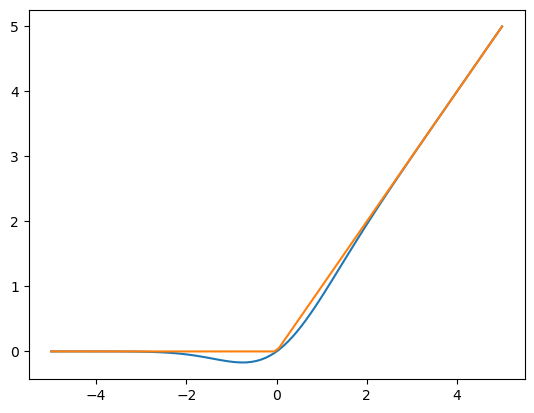

In [44]:
x = torch.linspace(-5,5,100)
x_np = x.data.numpy()
y = torch.nn.functional.gelu(x)
y_np = y.data.cpu().numpy()
plt.plot(x_np,y_np)

y = torch.nn.functional.relu(x)
y_np = y.data.cpu().numpy()
plt.plot(x_np,y_np)



# Автодифференцирование
## Понятие "Автодифференцирование"

Одна из главных причин использования `PyTorch` в проектах глубокого обучения заключается в том, что мы можем автоматически рассчитывать градиенты / производные от функций, которые мы определяем. Эта функция называется ["Автодифференцирование" (__autograd__)](https://pytorch.org/docs/stable/notes/autograd.html).  В основном мы будем использовать `PyTorch` для реализации нейронных сетей, а в сущности это всего лишь сложные функции с настраиваемыми параметрами.  

> Напомним, что если бы  нейронная сеть выдавала одно скалярное значение, мы бы говорили о получении производной, но вы увидите, что довольно часто у нас будет несколько выходных переменных (“значений”); в этом случае мы говорим о градиентах. Это более общий термин.

Как правило, мы определяем нейронную сеть как функцию входных данных $x$ и весовых коэффициентов (а также других параметров) $W$. Когда мы манипулируем нашими входными данными $x$, мы создаем __вычислительный граф__, то есть последовательность операций с входными данными. В каком-то смысле на графе показано, как получить результат на основе входных данных.

Фреймворк `PyTorch` автоматически собирает этот вычислительный граф. Это означает, что мы можем просто выполнять наши манипуляции, а `PyTorch` будет отслеживать их положение в графе за нас. В случае `PyTorch` мы создаем динамический график вычислений. То есть формируем его попутно описанию этих вычислений.




Для работы с автодифференцированием в библиотеке `PyTorch` имеется ряд встроенных функций, которые могут быть автоматически вызваны в коде.
Для осуществления автоматизированной работы с тензорами в `PyTorch` предусмотрен аргумент `requires_grad`, который должен быть помечен как `true`. Создадим тензор входных данных x (без градиента) и два тензора переменных коэффициентов `w` и `b` (с градиентом). Если тензор не включает расчет градиента, то его параметры не будут участвовать в автодифференцировании.


Про обратное распростронение ошибки можно найти [тут](https://mlu-explain.github.io/neural-networks/) и  [тут](https://dafriedman97.github.io/mlbook/content/c7/concept.html#back-propagation) и [тут](https://deepschool-pro.notion.site/1-db393ba62f0e49cfa3c29a615006e796).


In [45]:
x = torch.ones((3,))
print(x.requires_grad)

False


In [46]:
x = torch.tensor([3.,4.])
w = torch.tensor([4.,8], requires_grad=True)
b = torch.tensor(5., requires_grad=True)
print(x,w,b)

tensor([3., 4.]) tensor([4., 8.], requires_grad=True) tensor(5., requires_grad=True)


Для всех тензоров можно узнать значения градиентов для них. Если градиент для функции не посчитан, то его значение будет `None`.

In [47]:
print('current gradient:',x.grad,w.grad,b.grad)

current gradient: None None None


Кроме того необходимость расчета градиента может быть задана в ходе работы. Например, если мы решим заморозить значение `b` для модели (допустим мы его обучили) то это можно сделать следующим образом:  

In [48]:
b.requires_grad = False
print(b)
b.requires_grad = True
print(b)

tensor(5.)
tensor(5., requires_grad=True)


Значение градиента может быть получено для тензора при помощи метода `.backward(retain_graph=True)`. 

Также значение может быть задано или получено/обновлено (чаще всего обнулено), обращаясь к данным градиента, например `grad.data.zero_()`. Однако эту процедуру можно провести только для установленного значения градиента.

Построим теперь некоторую простейшую модель $\hat y = xW+b = \sum_{i=0}^1{x_iw_i}+b = x_1w_1+x_2w_2+b$, которая по сути представляет собой модель линейной регрессии для двух параметров $x_0$ и $x_1$.

In [49]:
y = x@w+b
print(y)

tensor(49., grad_fn=<AddBackward0>)


Обратите внимание, тут переменная `y` указана с функцией
по которой будет градиент.

In [50]:
print(y.grad_fn)

Допустим, что у нас есть целевое значение  `[50]`, расчитаем ошибку нашей модели.

In [51]:
y_label = torch.tensor([50])
error = torch.pow(y_label - y,2)
error

tensor([1.], grad_fn=<PowBackward0>)

Для данной модели произведем автодифференцирование.

__Отметим__, что такая процедура выполняется для скалярной функции.

Также важно отметить, что предполагается, что градиент будет посчитан единожды, прежде чем полученные значения будут где-то использованы.

Поэтому., __после использования градиента, его значения должны быть заменены нулями.__

В нашем примере метод `backward` будет означать расчет производной по обоим нашим параметрам. Поэтому после процедуры расчета можно будет получить значения при помощи метода `grad`. А также мы сможем обновить градиенты `data.zero_()`.

Напомним что в нашем случае $\frac{\delta e}{\delta W} = -x$; $\frac{\delta e}{\delta b} = -1$

In [52]:
de = torch.sum(error).backward(retain_graph=True)

print('''sum of de/dw:''', w.grad)
print('sum of de/db:', b.grad)

w.grad.data.zero_()
b.grad.data.zero_()

print( w.grad, b.grad)


sum of de/dw: tensor([-6., -8.])
sum of de/db: tensor(-2.)
tensor([0., 0.]) tensor(0.)


<blockquote>
    
Обратите внимание, что в предыдущем примере процедура `backward` выполнялась для скалярного значения. Для этого мы посчитали сумму ошибок. Это связано с тем, что обратное распространение ошибки рассчитывается для одного значения, которое часто принято называть _значением функции потерь_ или `loss`.
Также отметим, что чаще вместо простой суммы в подобных выражениях будет квадрат ошибки. Минимизация по квадрату ошибки — стандартная задача регрессии.
Более подробную информацию об автодифференцировании можно найти [тут](https://pytorch.org/docs/stable/notes/autograd.html).

__Важно сказать__, что любые операции со значениями градиента лучше всего проводить с использованием деректив `no_grad()` / `inference_mode()`. Дерективы  позволяют не учитывать действия следующие за ней в будущих расчета ошибки.
    
</blockquote>  




## Задания для самоконтроля

**1.** Задайтесь функцией, для которой несложно вычислить производную (например, $Q=2x^5$). Проверьте, что результат численной производной совпадает с расчетами методами `PyTorch`. 
> Отметим, что в целом `PyTorch` позволяет обеспечить широкий функционал для аппроксимации [функции и оптимизации для них](https://habr.com/ru/articles/808867/).

<details>
    
```python
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2

# external_grad = torch.tensor([1., 1.])
# Q.backward(gradient=external_grad)
Q.sum().backward()

print(9*a**2 == a.grad)
print(-2*b == b.grad)
```

**2.** Реализовать вычислительный граф `PyTorch` следующего вида.
<img src="https://pytorch.org/tutorials/_images/comp-graph.png" width="500px">

где `CE` — [`cross entropy loss`](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#cross-entropy) вида $CE = \sum y_i log \hat y_i$.

После того, как мы познакомились с некоторыми базовыми возможностями PyTorch попробуем записать линейную регрессию в рамках данного фреймворка.

Создадим набор данных для модели типа:

$y=w\cdotх+b + z$

где:
* Значение $w$ является наклоном.
* Значение $b$ — это смещение.
* $z$ - некоторый шум, неописываемый линейной моделью $\hat y=w\cdotх+b$

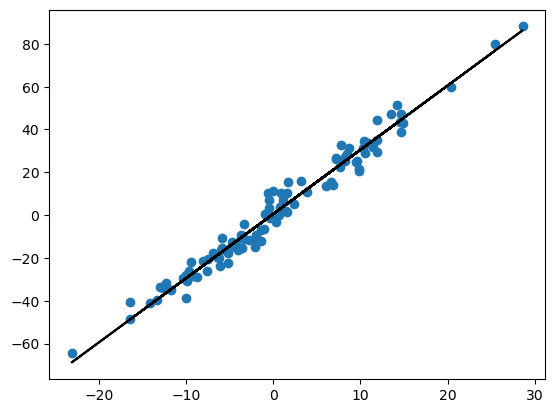

In [53]:
x = torch.randn(100, 1) * 10
y_clear = 3*x + 0.5
y = y_clear + 5 * torch.randn(100, 1)

plt.plot(x.cpu().numpy(),y.cpu().numpy(),'o')
plt.plot(x.cpu().numpy(),y_clear.cpu().numpy(),'-k')

Теперь попробуем применить линейнную регрессию для нашей модели. 

In [54]:
def model(x,w,b):
    return x * w + b

Проинициализируем параметры модели некоторыми случайными переменными

In [55]:
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

Зададим функцию потерь

$ MSE = \sum (y-x)^2 / N$

In [56]:
def mse(predicts, targets):
    diff = predicts - targets
    return torch.sum(torch.square(diff)) / diff.numel()

Посмотрим на начальные значения предсказаний и сравним их с ожидаемыми значениями путем подчета функции потерь (MSE)

In [57]:
predicts = model(x,w,b)
# print(predicts)

loss = mse(predicts, y)
print('loss = ',loss.data.cpu().numpy())

loss =  857.82477


Пока значение функции потерь большое, модель будет давать большую ошибку предсказания.

Для снижения функции потерь будем использовать метод градиентного спуска.

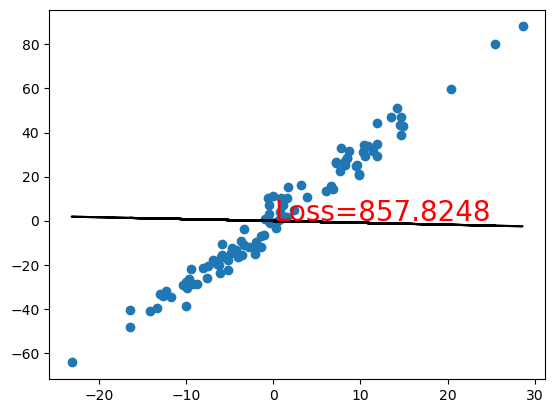

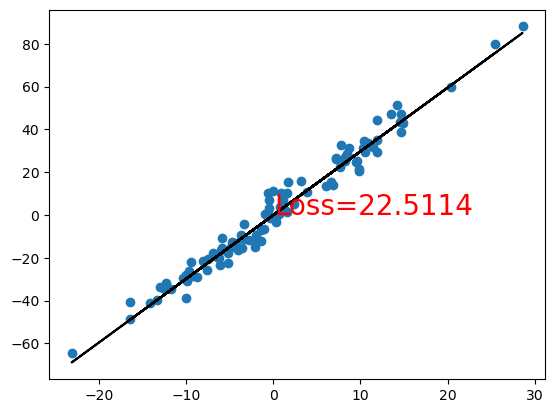

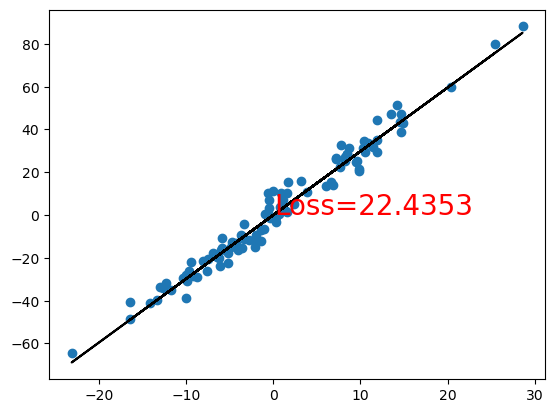

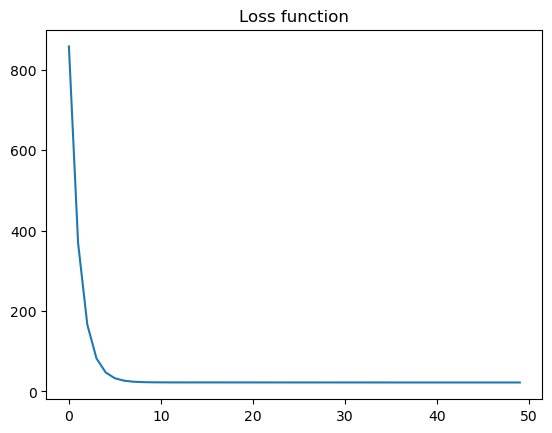

In [59]:
epochs = 50
LR = 0.002 

trainig = np.zeros(epochs)
for i in range(epochs):
    predicts = model(x,w,b)
    loss = mse(predicts, y)
    trainig[i] = loss.data.cpu().numpy()
    loss.backward()
    with torch.no_grad():
        w -= w.grad * LR
        b -= b.grad * LR
        w.grad.zero_()
        b.grad.zero_()

    if(i%20 == 0):
        plt.plot(x.data.cpu().numpy(),y.data.cpu().numpy(),'o')
        plt.plot(x.data.cpu().numpy(),predicts.data.cpu().numpy(),'-k')
        plt.text(0.1, 0.1, 'Loss=%.4f' %(trainig[i]), fontdict={'size': 20, 'color': 'red'})
        plt.show()
        
plt.plot(trainig,)
plt.title('Loss function')
plt.show()

посмотрим на найденные значения наклона и смещения

In [14]:
print(w)
print(b)

tensor([3.0104], requires_grad=True)
tensor([-0.0397], requires_grad=True)
